In [123]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


# Trajectory functions

In [124]:
def point_to_point_traj(x1, x2, v1, v2, delta_t):
  t = np.linspace(0, delta_t, 100)  
  a0 = x1
  a1 = v1
  a2 = (3*x2 - 3*x1 - 2*v1*delta_t - v2 * delta_t) / (delta_t**2)
  a3 = (2*x1 + (v1 + v2) * delta_t  - 2 * x2) / (delta_t**3)

  polynomial = a0 + a1 * t + a2 * t**2 + a3 * t**3
    
  print(str(a0) + " + " + str(a1) +"t + " + str(a2) + "t^2 + " + str(a3) + "t^3")
  derivative = a1 + 2*a2 * t + 3 * a3 * t**2
  return polynomial, derivative


def piecewise2D (X,Y, Vx, Vy, T):
    theta_x, theta_y, dx, dy = [], [], [], []

    for i in range(len(P)-1):          
        theta_xi, dxi = point_to_point_traj(X[i], X[i+1], Vx[i], Vx[i+1], T[i+1] - T[i])
        theta_yi, dyi = point_to_point_traj(Y[i], Y[i+1], Vy[i], Vy[i+1], T[i+1] - T[i])

        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi.tolist()
        dy += dyi.tolist()

        plot(theta_xi, theta_yi)
    return theta_x, theta_y, dx, dy

# Plotting functions

In [125]:
# Plotting
def plot_points():
    plot(X,Y, '--')
    plot(X,Y, 'o')
    quiver(X,Y, Vx, Vy, color='r')
    
# Speed
def plot_speed():
    speed = np.sqrt(np.array(dx)**2 + np.array(dy)**2)
    plot(speed)

# Example 1

In [126]:
##### Requirements for the trajectory

# Waypoints
p1 = [-5,-7]
p2 = [10,-7]
p3 = [10,-3]
p4 = [3,-3]
p5 = [3, 7]
p6 = [0,7]
p7 = [0,0]
p8 = [3,0]
p9 = [3,10]
p10 = [9, 10]

# Velocities
v1 = [1.5,0] # p1 to p2
v2 = [0,.4] # p2 to p3
v3 = [-.7,0] # p3 to p4
v4 = [0, .1] # p4 to p5
v5 = [-.3, 0] # p5 to p6
v6 = [0, -.7] # p6 to p7
v7 = [.3, 0] # p7 to p8
v8 = [0, .1] # p8 to p9
v9 = [.1, 0] # p9 to p10
v10 = [0, 0]


# Time
t1 = 0
t2 = 10
t3 = 20
t4 = 30
t5 = 40
t6 = 50
t7 = 60
t8 = 70
t9 = 80
t10 = 90

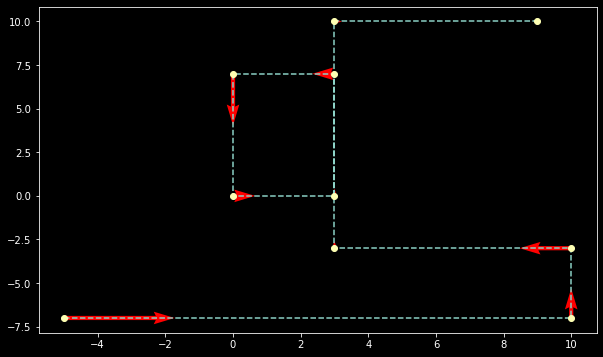

In [127]:
# Convert the initial conditions to a vector form
P = np.vstack((p1, p2, p3, p4, p5, p6, p7, p8, p9, p10))
V = np.vstack((v1, v2, v3, v4, v5, v6, v7, v8, v9, v10))
T = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]


    
plot_points()

-5 + 1.5t + 0.15t^2 + -0.015t^3
-7 + 0.0t + -0.04t^2 + 0.004t^3
10 + 0.0t + 0.07t^2 + -0.007t^3
-7 + 0.4t + 0.04t^2 + -0.004t^3
10 + -0.7t + -0.07t^2 + 0.007t^3
-3 + 0.0t + -0.01t^2 + 0.001t^3
3 + 0.0t + 0.03t^2 + -0.003t^3
-3 + 0.1t + 0.28t^2 + -0.019t^3
3 + -0.3t + -0.03t^2 + 0.003t^3
7 + 0.0t + 0.07t^2 + -0.007t^3
0 + 0.0t + -0.03t^2 + 0.003t^3
7 + -0.7t + -0.07t^2 + 0.007t^3
0 + 0.3t + 0.03t^2 + -0.003t^3
0 + 0.0t + -0.01t^2 + 0.001t^3
3 + 0.0t + -0.01t^2 + 0.001t^3
0 + 0.1t + 0.28t^2 + -0.019t^3
3 + 0.1t + 0.16t^2 + -0.011t^3
10 + 0.0t + 0.0t^2 + 0.0t^3


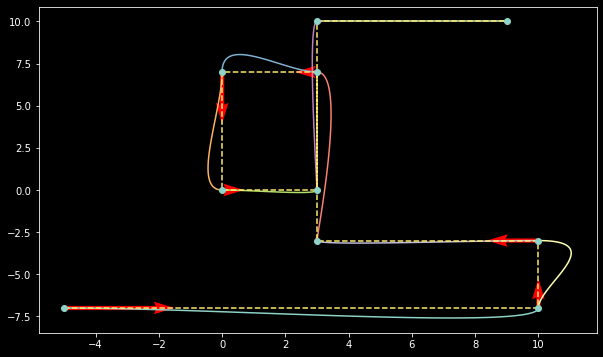

In [128]:
# Plot the trajectory that passes trhough the desired waypoints
theta_x, theta_y, dx, dy = piecewise2D(X,Y, Vx, Vy, T)
plot_points()

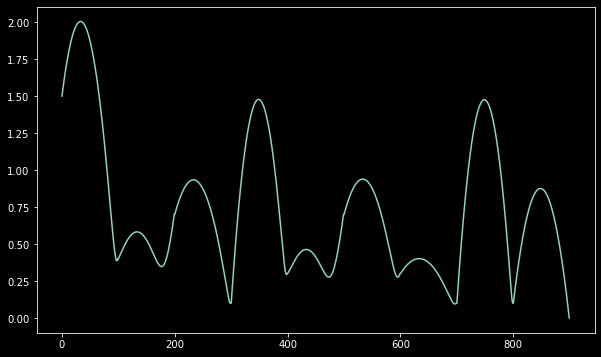

In [129]:
# Plot speed
plot_speed()

# Example 2

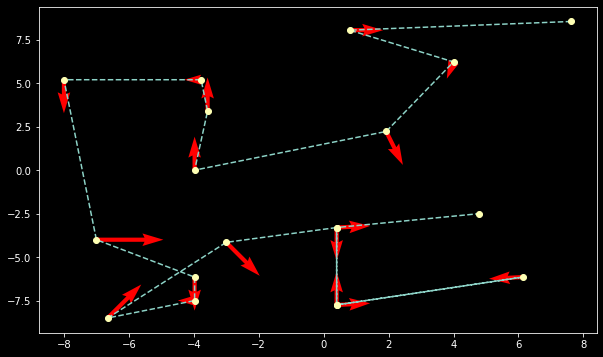

7.625 + 0.1t + -1.0590000000000002t^2 + 0.15319999999999998t^3
8.55 + 0.0t + -0.06t^2 + 0.008t^3
0.8 + 1.0t + 0.023999999999999987t^2 + -0.019200000000000002t^3
8.05 + 0.0t + -0.1190000000000002t^2 + 0.009200000000000017t^3
4.0 + -0.2t + -0.26899999999999996t^2 + 0.045200000000000004t^3
6.225 + -0.5t + -0.07999999999999986t^2 + 0.003999999999999993t^3
1.925 + 0.5t + -0.9080000000000001t^2 + 0.1144t^3
2.225 + -1.0t + -0.06700000000000003t^2 + 0.0356t^3
-3.975 + 0.0t + 0.04799999999999997t^2 + -0.006399999999999999t^3
0.0 + 1.0t + -0.19200000000000003t^2 + 0.0256t^3
-3.575 + 0.0t + 0.07600000000000008t^2 + -0.016800000000000006t^3
3.4 + 1.0t + -0.1839999999999999t^2 + 0.011200000000000003t^3
-3.775 + -0.5t + -0.30700000000000005t^2 + 0.047599999999999996t^3
5.2 + 0.0t + 0.2t^2 + -0.04t^3
-8.0 + 0.0t + -0.28t^2 + 0.064t^3
5.2 + -1.0t + -0.7040000000000001t^2 + 0.1072t^3
-7.0 + 2.0t + -0.43700000000000006t^2 + 0.0316t^3
-4.0 + 0.0t + -0.058000000000000114t^2 + -0.005599999999999995t^3
-3.9

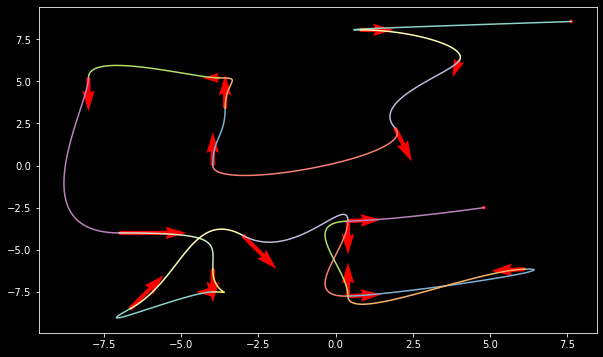

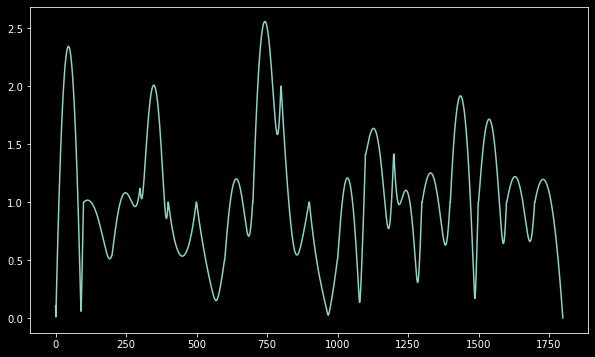

In [131]:
##### Requirements for the trajectory

# Waypoints
p01 = [ 7.625,  8.550]  # start
p02 = [ 0.800,  8.050]  # sphere 1 (sphere1)
p03 = [ 4.000,  6.225]  # aux point 1
p04 = [ 1.925,  2.225]  # sphere 2 (sphere)
p05 = [-3.975,  0.000]  # aux point 2
p06 = [-3.575,  3.400]  # sphere 3 (sphere0)
p07 = [-3.775,  5.200]  # aux point 3
p08 = [-8.000,  5.200]  # aux point 4
p09 = [-7.000, -4.000]  # aux point 5
p10 = [-3.975, -6.150]  # aux point 6
p11 = [-3.975, -7.500]  # aux point 7
p12 = [-6.650, -8.500]  # sphere 4 (sphere4)
p13 = [-3.000, -4.150]  # aux point 8 (close to aux point 6)
p14 = [ 0.400, -3.300]  # aux point 9
p15 = [ 0.400, -7.750]  # aux point 10
p16 = [ 6.125, -6.150]  # sphere 5 (sphere3)
p17 = [ 0.400, -7.750]  # aux points 11 (same as aux point 10)
p18 = [ 0.400, -3.300]  # aux point 12 (same as aux point 9)
p19 = [ 4.800, -2.500]  # sphere 6 (sphere2), end


# Velocities
v01 = [ 0.100,  0.000]  # p1 to p2
v02 = [ 1.000,  0.000]  # p2 to p3
v03 = [-0.200, -0.500]  # p3 to p4
v04 = [ 0.500, -1.000]  # p4 to p5
v05 = [ 0.000,  1.000]  # p5 to p6
v06 = [ 0.000,  1.000]  # p6 to p7
v07 = [-0.500,  0.000]  # p7 to p8
v08 = [ 0.000, -1.000]  # p8 to p9
v09 = [ 2.000,  0.000]  # p9 to p10
v10 = [ 0.000, -1.000]  # p10 to p11
v11 = [-0.500,  0.000]  # p11 to p12
v12 = [ 1.000,  1.000]  # p12 to p13
v13 = [ 1.000, -1.000]  # p13 to p14
v14 = [ 0.000, -1.000]  # p14 to p15
v15 = [ 1.000,  0.050]  # p15 to p16
v16 = [-1.000, -0.050]  # p16 to p17
v17 = [ 0.000,  1.000]  # p17 to p18
v18 = [ 1.000,  0.050]  # p18 to p19
v19 = [ 0.000,  0.000]  # 0

# Time
t01 = 0
t02 = t01 + 5
t03 = t02 + 5
t04 = t03 + 5
t05 = t04 + 5
t06 = t05 + 5
t07 = t06 + 5
t08 = t07 + 5
t09 = t08 + 5
t10 = t09 + 5
t11 = t10 + 5
t12 = t11 + 5
t13 = t12 + 5
t14 = t13 + 5
t15 = t14 + 5
t16 = t15 + 5
t17 = t16 + 5
t18 = t17 + 5
t19 = t18 + 5


# Grouping
P = np.vstack((p01, p02, p03, p04, p05, p06, p07, p08, p09, p10, p11, p12, p13, p14, p15, p16, p17, p18, p19))
V = np.vstack((v01, v02, v03, v04, v05, v06, v07, v08, v09, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19))
T = [t01, t02, t03, t04, t05, t06, t07, t08, t09, t10, t11, t12, t13, t14, t15, t16, t17, t18, t19]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]

# Plotting
plot_points()
show()

# Piecewise function
theta_x, theta_y, dx, dy = piecewise2D(X,Y, Vx, Vy, T)

# Plotting
quiver(X,Y, Vx, Vy, color='r')  #

show()
plot_speed()

# Moving the point in time
Be sure that you have JSAnimation installed. If not pip install JSAnimation

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    ax.plot(theta_x, theta_y, 'b--')
    
    # Initial conditions
    ax.plot(X,Y, 'go')
    ax.quiver(X,Y, Vx, Vy, color='0.4', scale=20)
        
    # Dynamic position
    ax.plot(theta_x[t], theta_y[t], 'ro', markersize=10)
       
    # Velocity vector
    ax.quiver([theta_x[t]], [theta_y[t]], [dx[t]], [dy[t]], color='r', units='xy', scale=10/np.linalg.norm([theta_x[t], theta_y[t]]))
    

anim = animation.FuncAnimation(fig, animate, frames=int(len(theta_x)/1), interval=25)


HTML(anim.to_jshtml())

In [ ]:
# Export the movie to mp4
Be sure that you have the ffmpeg codec installed (sudo apt-get install ffmpeg).

In [ ]:
anim.save('trajectory2.mp4', dpi=300)